# Lab 5


## Exercise 0: Commiting previous labs

There doesn't seem to be an easy way to setup a private repository that has been forked. Therefore we are going to attempt a work around: each of you will create your own private repository for storing your solutions and add course instructors as members.

### Part a

In a terminal, create make a copy of the repository you have been using. For example, navigate into the correct directory in your file system and use `cp -r Data1402.2021.Spring Data1402.Solutions.$USER`.

### Part b
Remove the ".git" directory, for example `rm -rf Data1402.Solutions.$USER/.git`.


### Part c

Use [Github's Create a new repository form](https://github.com/new) to create a repository, named as specificed above.

### Part d

Follow the instructions provided after creating the repository to initialize the directory as a git repository. Commit and push your solutions.

### Part e

On the github page for your repository, goto the settings top tab and select manage access on side tab. Invite user `afarbin@gmail.com` as a collaborator.


In [ ]:
#check

## Setup for SUSY Dataset

Use the SUSY dataset for the rest of this lab. Here is a basic setup.

In [1]:
# Our usual libraries...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, display
import tabulate

In [2]:
filename="../../../Data/SUSY.csv"
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", 
          "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET",
          "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
df = pd.read_csv(filename, dtype='float64', names=VarNames)

In [3]:
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

You can see the data in Jupyter by just evaluateing the dataframe:

## Scikit-Learn

[Scikit-learn](http://scikit-learn.org) is a rich python library for data science, including machine learning. For example, we can build a Fisher Discriminant (aka Linear Discriminant Analysis, or LDA). 

### Exercise 1: Install Scikit-Learn

Follow the [Installation Instructions](https://scikit-learn.org/stable/install.html) and install `scikit-learn` in your environment.

In [4]:
import sklearn as skl

### Exercise 2: Read About Classifiers

#### Part a
Scikit-learn offers an impressively comprehensive list of machine learning algorithms. Browse through [scikit-learn's documentation](https://scikit-learn.org/stable/index.html). You'll note the algorithms are organized into classification, regression, clustering, dimensionality reduction, model selection, and preprocessing. Browse through the list of [classification algorithms](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning). 

#### Part b
Note scikit-learn's documentation is rather comprehensive. The documentation on [linear models](https://scikit-learn.org/stable/modules/linear_model.html) shows how classification problems are setup. Read about the first few methods and try to comprehend the example codes. Skim the rest of the document.

#### Part c
Read through the[LDA Documentation](https://scikit-learn.org/stable/modules/lda_qda.html).


### Exercise 3: Training a Classifier

Lets' repeat what we did manually in the previous lab using scikit-learn. We'll use a LDA classifier, which we can instanciate as follows:

In [34]:
import sklearn.discriminant_analysis as DA
Fisher=DA.LinearDiscriminantAnalysis()
RawFish=DA.LinearDiscriminantAnalysis()
FeaFish= DA.LinearDiscriminantAnalysis()

As discussed in the lecture, to properly formulate our problem, we'll have to:

* Define the inputs (X) vs outputs (Y)
* Designate training vs testing samples (in order to get a unbias assessment of the performance of Machine Learning algorithms)

for example, here we'll take use 4M events for training and the remainder for testing.

In [6]:
N_Train=4000000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:]

X_Train=Train_Sample[VarNames[1:]]
y_Train=Train_Sample["signal"]

X_Test=Test_Sample[VarNames[1:]]
y_Test=Test_Sample["signal"]

Test_sig=Test_Sample[Test_Sample.signal==1]
Test_bkg=Test_Sample[Test_Sample.signal==0]


In [29]:
Raw_X_Train=Train_Sample[RawNames]
Raw_y_Train=Train_Sample["signal"]

Raw_X_Test=Test_Sample[RawNames]
Raw_y_Test=Test_Sample["signal"]


Raw_Test_sig=Test_Sample[Test_Sample.signal==1][["signal"]+RawNames]
Raw_Test_bkg=Test_Sample[Test_Sample.signal==0][["signal"]+RawNames]

In [31]:
Fea_X_Train=Train_Sample[FeatureNames]
Fea_y_Train=Train_Sample["signal"]

Fea_X_Test=Test_Sample[FeatureNames]
Fea_y_Test=Test_Sample["signal"]


Fea_Test_sig=Test_Sample[Test_Sample.signal==1][["signal"]+FeatureNames]
Fea_Test_bkg=Test_Sample[Test_Sample.signal==0][["signal"]+FeatureNames]

In [17]:
Raw_Test_sig

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi
4000000,1.0,0.923907,-1.441372,-0.238844,1.057547,0.028864,0.864359,0.352871,-1.195625
4000002,1.0,2.670802,-0.013990,0.736606,0.609833,-0.656067,-1.484281,0.910899,-1.170275
4000003,1.0,0.409369,0.612534,-0.702401,0.972580,1.728771,-0.160458,2.095931,1.423843
4000005,1.0,1.099852,-0.467916,-1.145902,1.274313,-0.274880,0.374156,0.419503,-0.357096
4000006,1.0,0.694619,-1.126946,-0.524846,0.954485,-0.945414,1.454058,0.481565,0.922563
...,...,...,...,...,...,...,...,...,...
4999986,1.0,0.951119,-1.025120,0.735755,1.072442,-1.268414,-1.365378,0.496042,-1.378751
4999988,1.0,2.039801,0.851302,0.125229,0.934144,0.551678,-0.811299,1.602762,-0.852513
4999991,1.0,1.031701,0.648011,-1.616710,0.532912,1.663047,-1.243807,0.706740,0.189915
4999995,1.0,0.853325,-0.961783,-1.487277,0.678190,0.493580,1.647969,1.843867,0.276954


In [8]:
Raw_X_Train

,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi
0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000
1,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136
2,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026
3,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041
4,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742
...,...,...,...,...,...,...,...,...
3999995,1.002406,0.385042,1.331986,1.525072,-1.197863,1.286476,1.514978,1.128357
3999996,0.425602,-1.589667,0.657618,0.575109,-1.646749,-1.352795,0.426123,0.308892
3999997,0.926546,0.269231,0.956893,1.223767,1.209497,-0.990745,0.764778,-0.207391
3999998,0.447816,1.157764,-0.562344,0.518973,1.086016,1.511437,0.149221,-1.672102


In [9]:
Raw_y_Train

0          0.0
1          1.0
2          1.0
3          1.0
4          1.0
          ... 
3999995    1.0
3999996    0.0
3999997    0.0
3999998    0.0
3999999    0.0
Name: signal, Length: 4000000, dtype: float64

In [8]:
Train_sig=Train_Sample[Train_Sample.signal==1]
Train_bkg=Train_Sample[Train_Sample.signal==0]

We can train the classifier as follow:

In [35]:
Fisher.fit(X_Train,y_Train)
RawFish.fit(Raw_X_Train,Raw_y_Train)
FeaFish.fit(Fea_X_Train,Fea_y_Train)

LinearDiscriminantAnalysis()

We can plot the output, comparing signal and background:

In [10]:
Fisher.decision_function(Test_sig[VarNames[1:]])

array([-0.97507599,  2.01882522, -0.04786596, ...,  0.41997997,
        0.59490396,  2.49602394])

In [11]:
skl.preprocessing.scale(Fisher.decision_function(Test_sig[VarNames[1:]]))

array([-0.94794857,  0.85578138, -0.38933412, ..., -0.10747187,
       -0.00208575,  1.14327837])

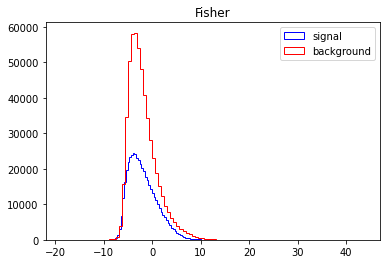

In [13]:
plt.figure()
plt.title('Fisher')
plt.hist(Fisher.decision_function(skl.preprocessing.scale(Test_sig[VarNames[1:]])),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(Fisher.decision_function(skl.preprocessing.scale(Test_bkg[VarNames[1:]])),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

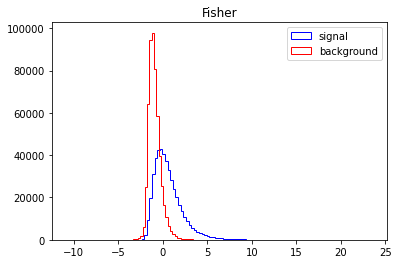

In [14]:
plt.figure()
plt.title('Fisher')
plt.hist(Fisher.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

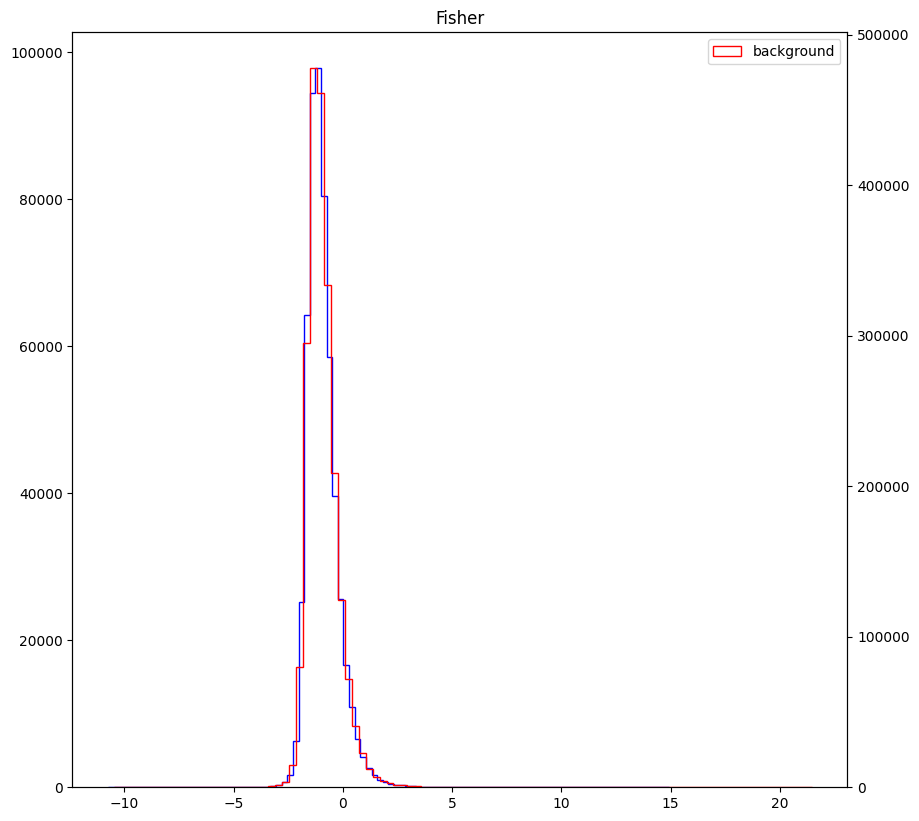

In [15]:
fig,ax = plt.subplots(figsize=[10,10], dpi = 100)
plt.title('Fisher')
ax.hist(Fisher.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
ax2=ax.twinx()
ax2.hist(Fisher.decision_function(Train_bkg[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

In [ ]:
compare_hist()

In [ ]:
Train_sig=Train_Sample[Train_Sample.signal==1]
Train_bkg

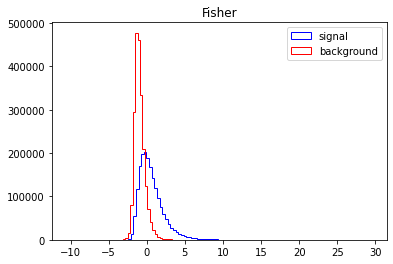

In [16]:
plt.figure()
plt.title('Fisher')
plt.hist(Fisher.decision_function(Train_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Train_bkg[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

In [61]:
from sklearn import linear_model

In [62]:
reg = linear_model.Ridge()

In [63]:
reg.fit(X_Train,y_Train)

Ridge()

In [20]:
Test_sig[VarNames[1:]]

,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
4000000,0.923907,-1.441372,-0.238844,1.057547,0.028864,0.864359,0.352871,-1.195625,0.529703,0.041676,1.132103,0.706005,0.553398,1.298212,1.085598,1.040200,0.316413,0.035090
4000002,2.670802,-0.013990,0.736606,0.609833,-0.656067,-1.484281,0.910899,-1.170275,0.174943,-0.512100,1.639347,1.741127,0.942485,0.759326,1.335007,1.002140,0.212227,0.618720
4000003,0.409369,0.612534,-0.702401,0.972580,1.728771,-0.160458,2.095931,1.423843,3.146250,-1.775331,0.638898,1.569204,2.179535,3.274070,0.894247,2.534580,1.536091,0.297036
4000005,1.099852,-0.467916,-1.145902,1.274313,-0.274880,0.374156,0.419503,-0.357096,0.612531,0.612372,0.977180,0.633602,0.575384,0.000000,0.951169,0.103618,0.761928,0.097241
4000006,0.694619,-1.126946,-0.524846,0.954485,-0.945414,1.454058,0.481565,0.922563,0.414908,-0.130204,0.663017,0.685603,0.917624,0.747291,0.681248,0.562830,1.302854,0.203535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999986,0.951119,-1.025120,0.735755,1.072442,-1.268414,-1.365378,0.496042,-1.378751,0.027446,0.241199,0.841212,0.726010,0.765865,0.000000,0.816827,0.300119,0.758559,0.259673
4999988,2.039801,0.851302,0.125229,0.934144,0.551678,-0.811299,1.602762,-0.852513,0.209035,0.412390,1.370954,1.584090,1.025354,0.202440,1.102830,0.605197,0.739403,0.612186
4999991,1.031701,0.648011,-1.616710,0.532912,1.663047,-1.243807,0.706740,0.189915,0.433557,-0.393302,0.809631,1.087218,1.191645,1.972363,0.698013,1.564201,0.035361,0.504437
4999995,0.853325,-0.961783,-1.487277,0.678190,0.493580,1.647969,1.843867,0.276954,1.025105,-1.486535,0.892879,1.684429,1.674084,3.366298,1.046707,2.646649,1.389226,0.364599


In [21]:
len(reg.predict(Test_sig[VarNames[1:]]))

458233

In [22]:
str(reg)[0:-2]

'Ridge'

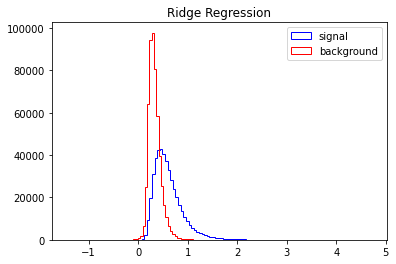

In [64]:
plt.figure()
plt.title('Ridge Regression')
plt.hist(reg.predict(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(reg.predict(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

In [65]:
perc = linear_model.Perceptron()

In [67]:
perc.fit(X_Train,y_Train)

Perceptron()

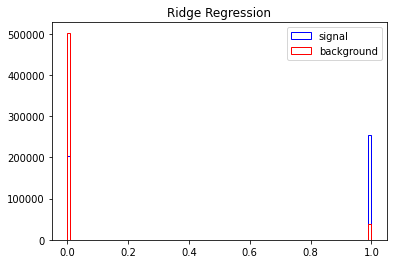

In [68]:
plt.figure()
plt.title('Ridge Regression')
plt.hist(perc.predict(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(perc.predict(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

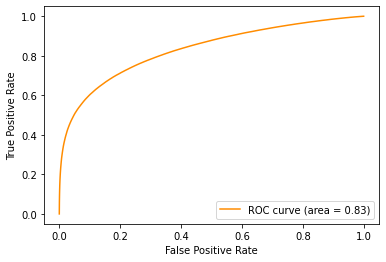

In [69]:
fpr, tpr, _ = roc_curve(y_Test, perc.decision_function(X_Test))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [6]:
#clm = skl.svm.LinearSVC()

In [ ]:
#clm.fit(X_Train,y_Train)

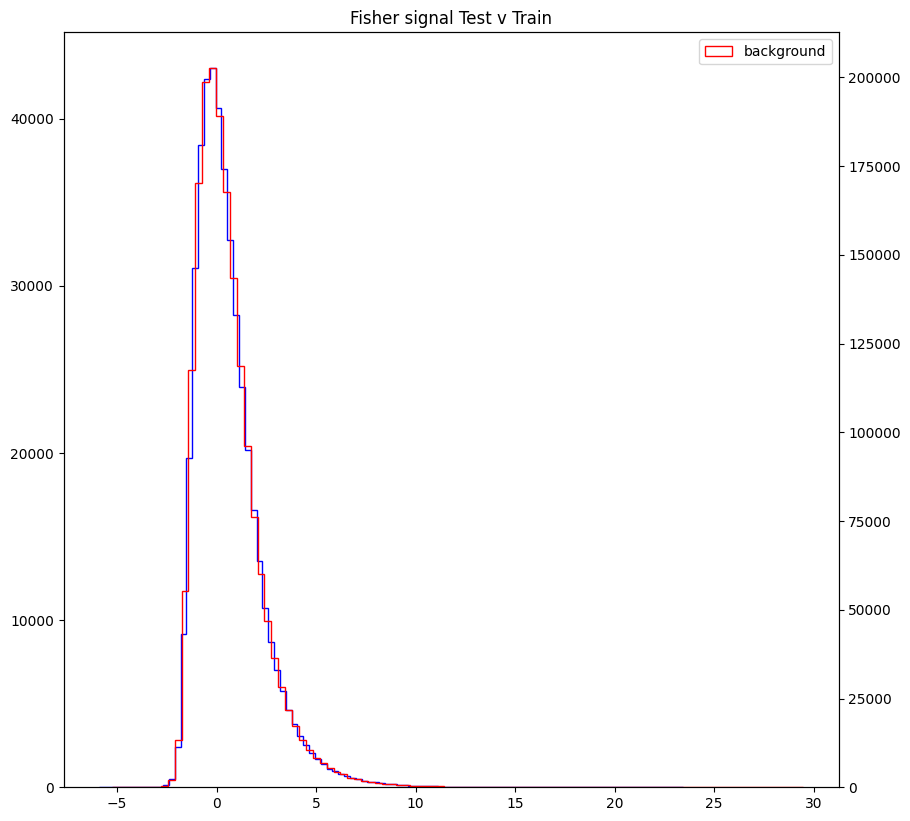

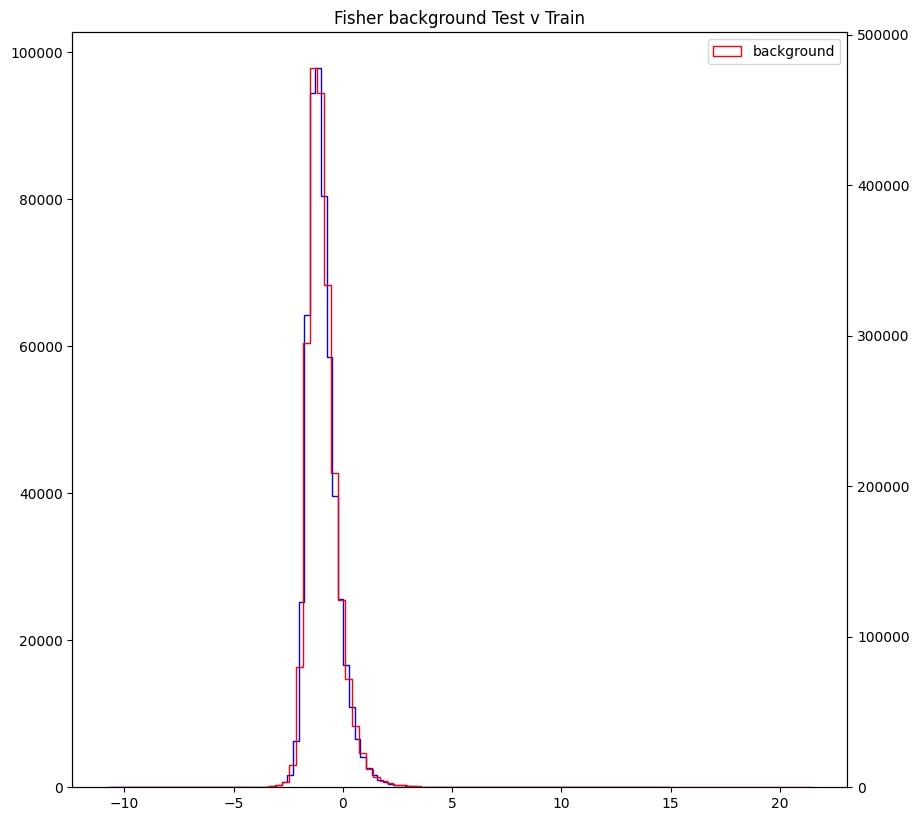

In [26]:
fig,ax = plt.subplots(figsize=[10,10], dpi = 100)
plt.title('Fisher signal Test v Train')
ax.hist(Fisher.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
ax2=ax.twinx()
ax2.hist(Fisher.decision_function(Train_sig[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()
fig,ax = plt.subplots(figsize=[10,10], dpi = 100)
plt.title('Fisher background Test v Train')
ax.hist(Fisher.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
ax2=ax.twinx()
ax2.hist(Fisher.decision_function(Train_bkg[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

#### Part a

Compare ROC curves computed on the test versus training samples, in a single plot. Do you see a bias?

In [26]:
from sklearn.metrics import roc_curve, auc

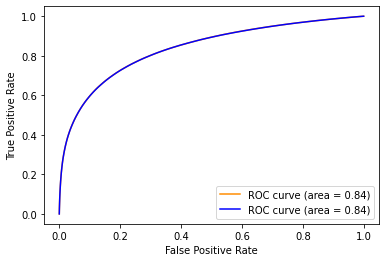

In [27]:
Tefpr, Tetpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))
Teroc_auc = auc(Tefpr, Tetpr)

Trfpr, Trtpr, _ = roc_curve(y_Train, Fisher.decision_function(X_Train))
Trroc_auc = auc(Trfpr, Trtpr)

plt.plot(Tefpr,Tetpr,color='darkorange',label='ROC curve (area = %0.2f)' % Teroc_auc)
plt.plot(Trfpr,Trtpr,color='blue',label='ROC curve (area = %0.2f)' % Trroc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

#### Part b

Train the Fisher performance of using the raw, features, and raw+features as input. Compare the performance one a single plot. 

In [ ]:
raw = linear_model.Ridge()
rawplus = linear_model.Ridge()

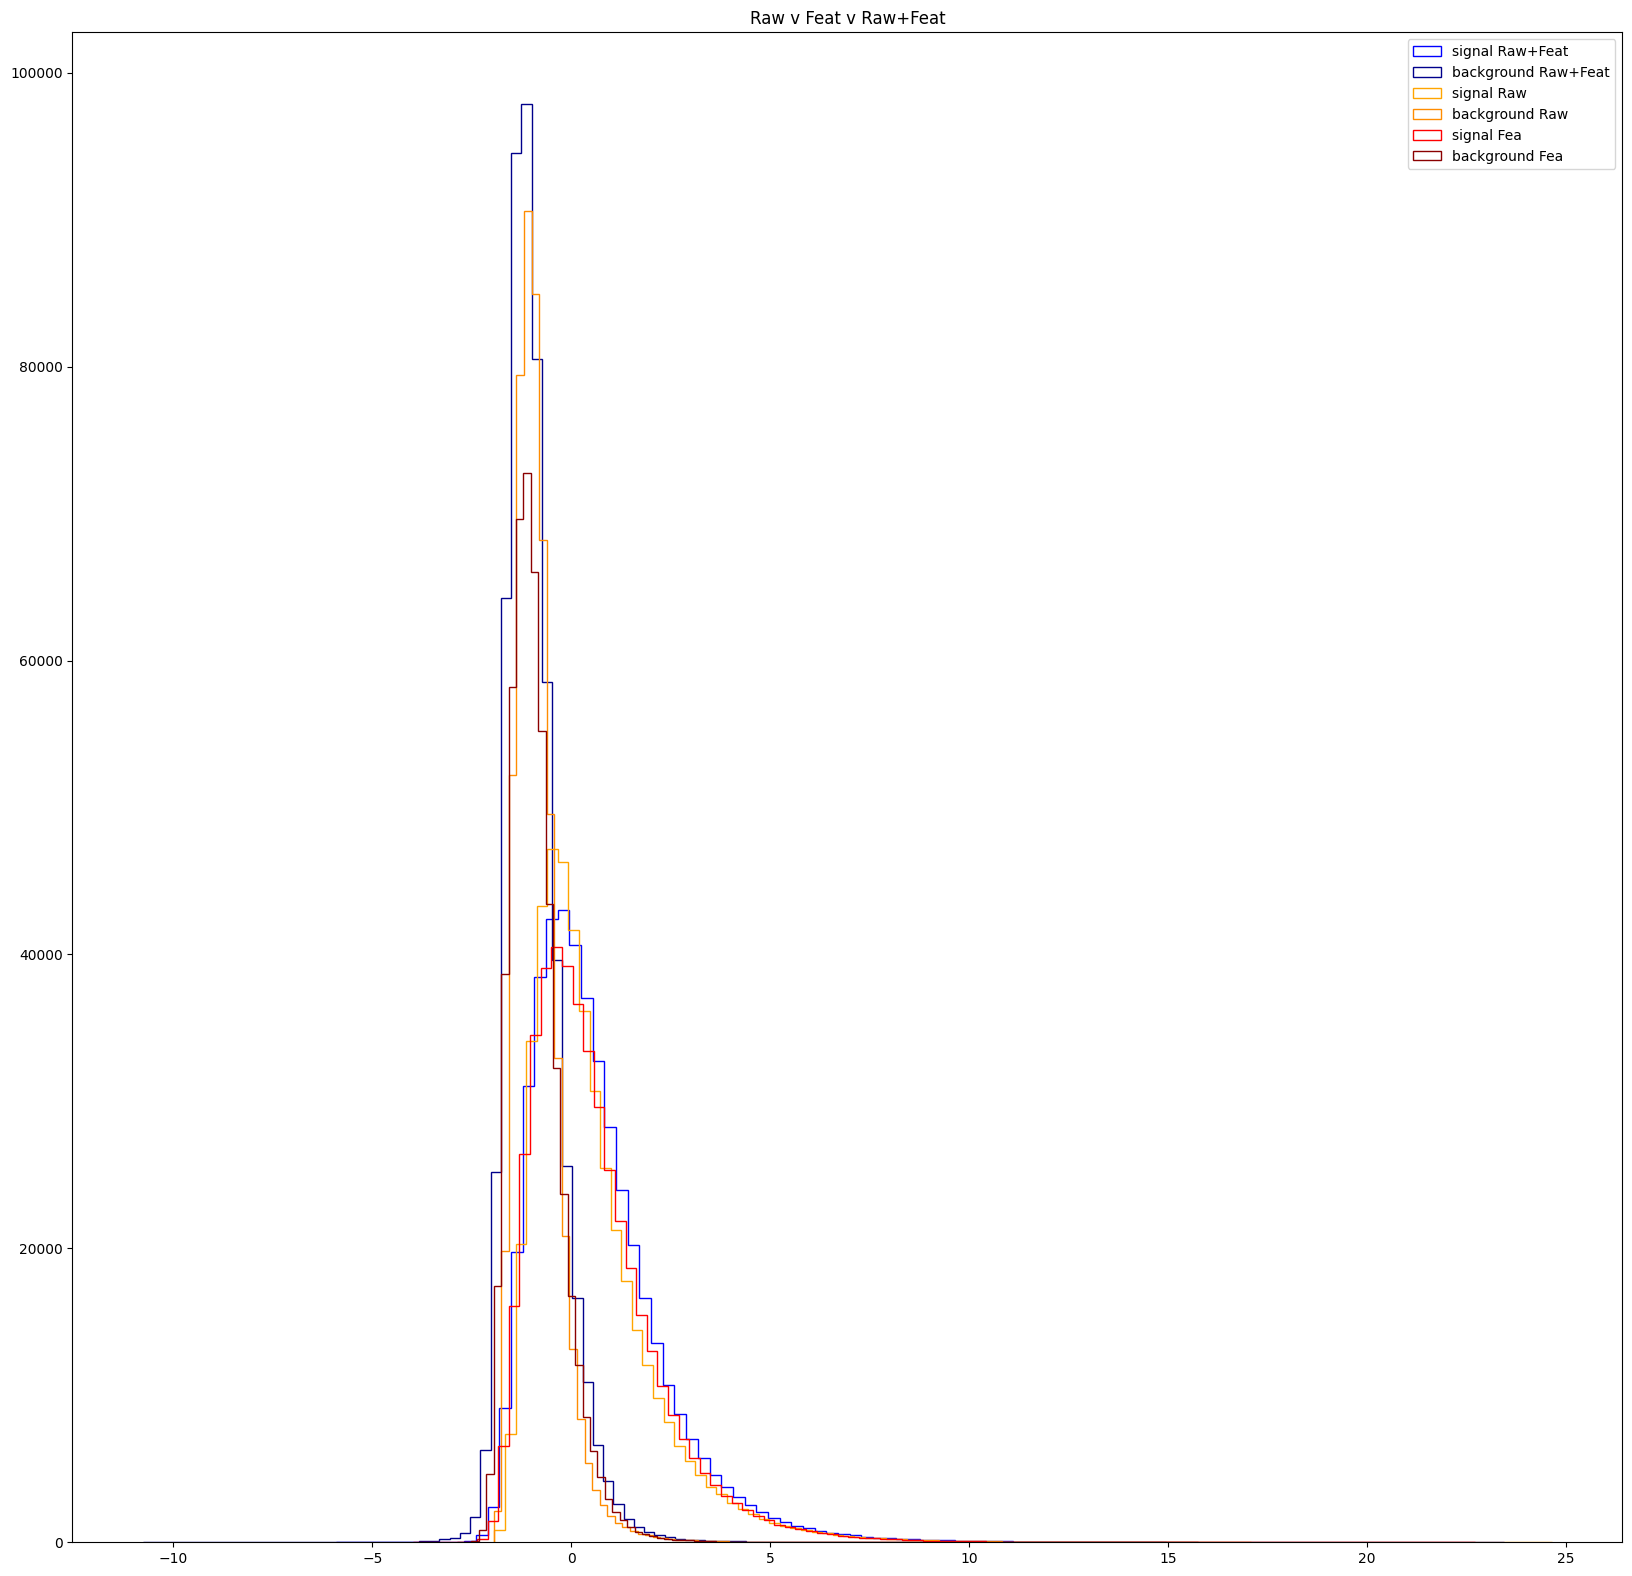

In [58]:
fig,ax = plt.subplots(figsize=[20,20], dpi = 100)
plt.title('Raw v Feat v Raw+Feat')
ax.hist(Fisher.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal Raw+Feat",stacked=True)
ax.hist(Fisher.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="darkblue", label="background Raw+Feat",stacked=True)
ax.hist(RawFish.decision_function(Test_sig[RawNames]),bins=100,histtype="step", color="orange", label="signal Raw",stacked=True)
ax.hist(RawFish.decision_function(Test_bkg[RawNames]),bins=100,histtype="step", color="darkorange", label="background Raw",stacked=True)
ax.hist(FeaFish.decision_function(Test_sig[FeatureNames]),bins=100,histtype="step", color='red', label="signal Fea",stacked=True)
ax.hist(FeaFish.decision_function(Test_bkg[FeatureNames]),bins=100,histtype="step", color='darkred', label="background Fea",stacked=True)
#ax2=ax.twinx()
#ax2.hist(Fisher.decision_function(Raw_Train_sig[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

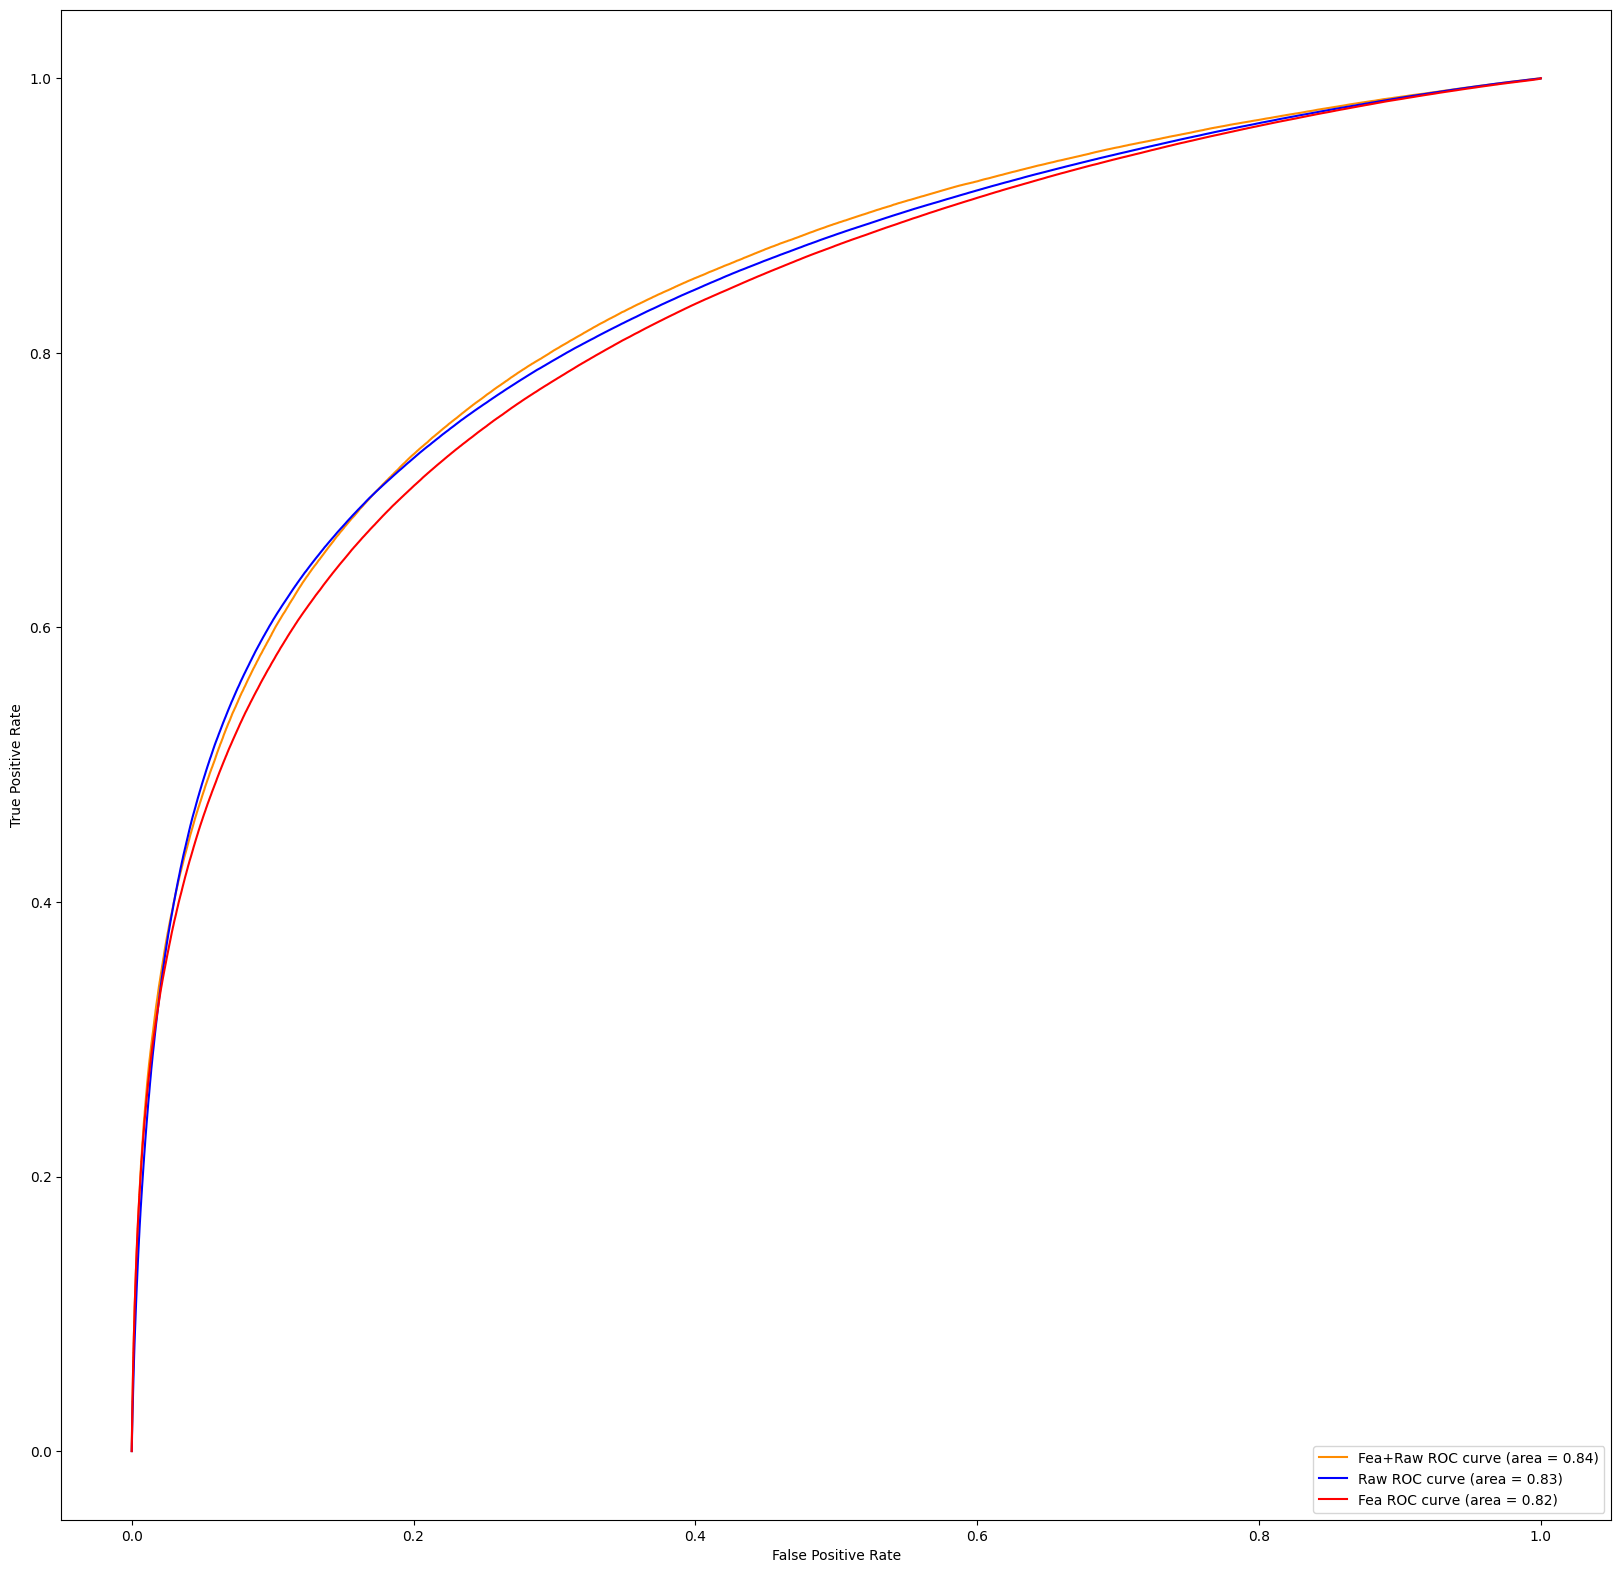

In [59]:
fpr, tpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))
roc_auc = auc(fpr, tpr)

rafpr, ratpr, _ = roc_curve(Raw_y_Train, RawFish.decision_function(Raw_X_Train))
raroc_auc = auc(rafpr, ratpr)

fefpr, fetpr, _ = roc_curve(Fea_y_Train, FeaFish.decision_function(Fea_X_Train))
feroc_auc = auc(fefpr, fetpr)

fig,ax = plt.subplots(figsize=[20,20], dpi = 100)
ax.plot(fpr,tpr,color='darkorange',label='Fea+Raw ROC curve (area = %0.2f)' % Teroc_auc)
ax.plot(rafpr,ratpr,color='blue',label='Raw ROC curve (area = %0.2f)' % raroc_auc)
ax.plot(fefpr,fetpr,color='red',label='Fea ROC curve (area = %0.2f)' % feroc_auc)
ax.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()



### Exercise 4: Comparing Techniques

#### Part a
Select 3 different classifiers from the techniques listed [here](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning) to compare. Note that you can use the multi-layer perceptron to build a deep network, though training may be prohibitively slow. So avoid this technique.

#### Part b

Write a function that takes an instantiated classifier and performs the comparison from part 3b. Use the function on your choice of functions in part a.

#### Part c

Use the best method from part c to compute the maximal significance $\sigma_S= \frac{N_S}{\sqrt{N_S+N_B}}$ for the scenarios in lab 3.

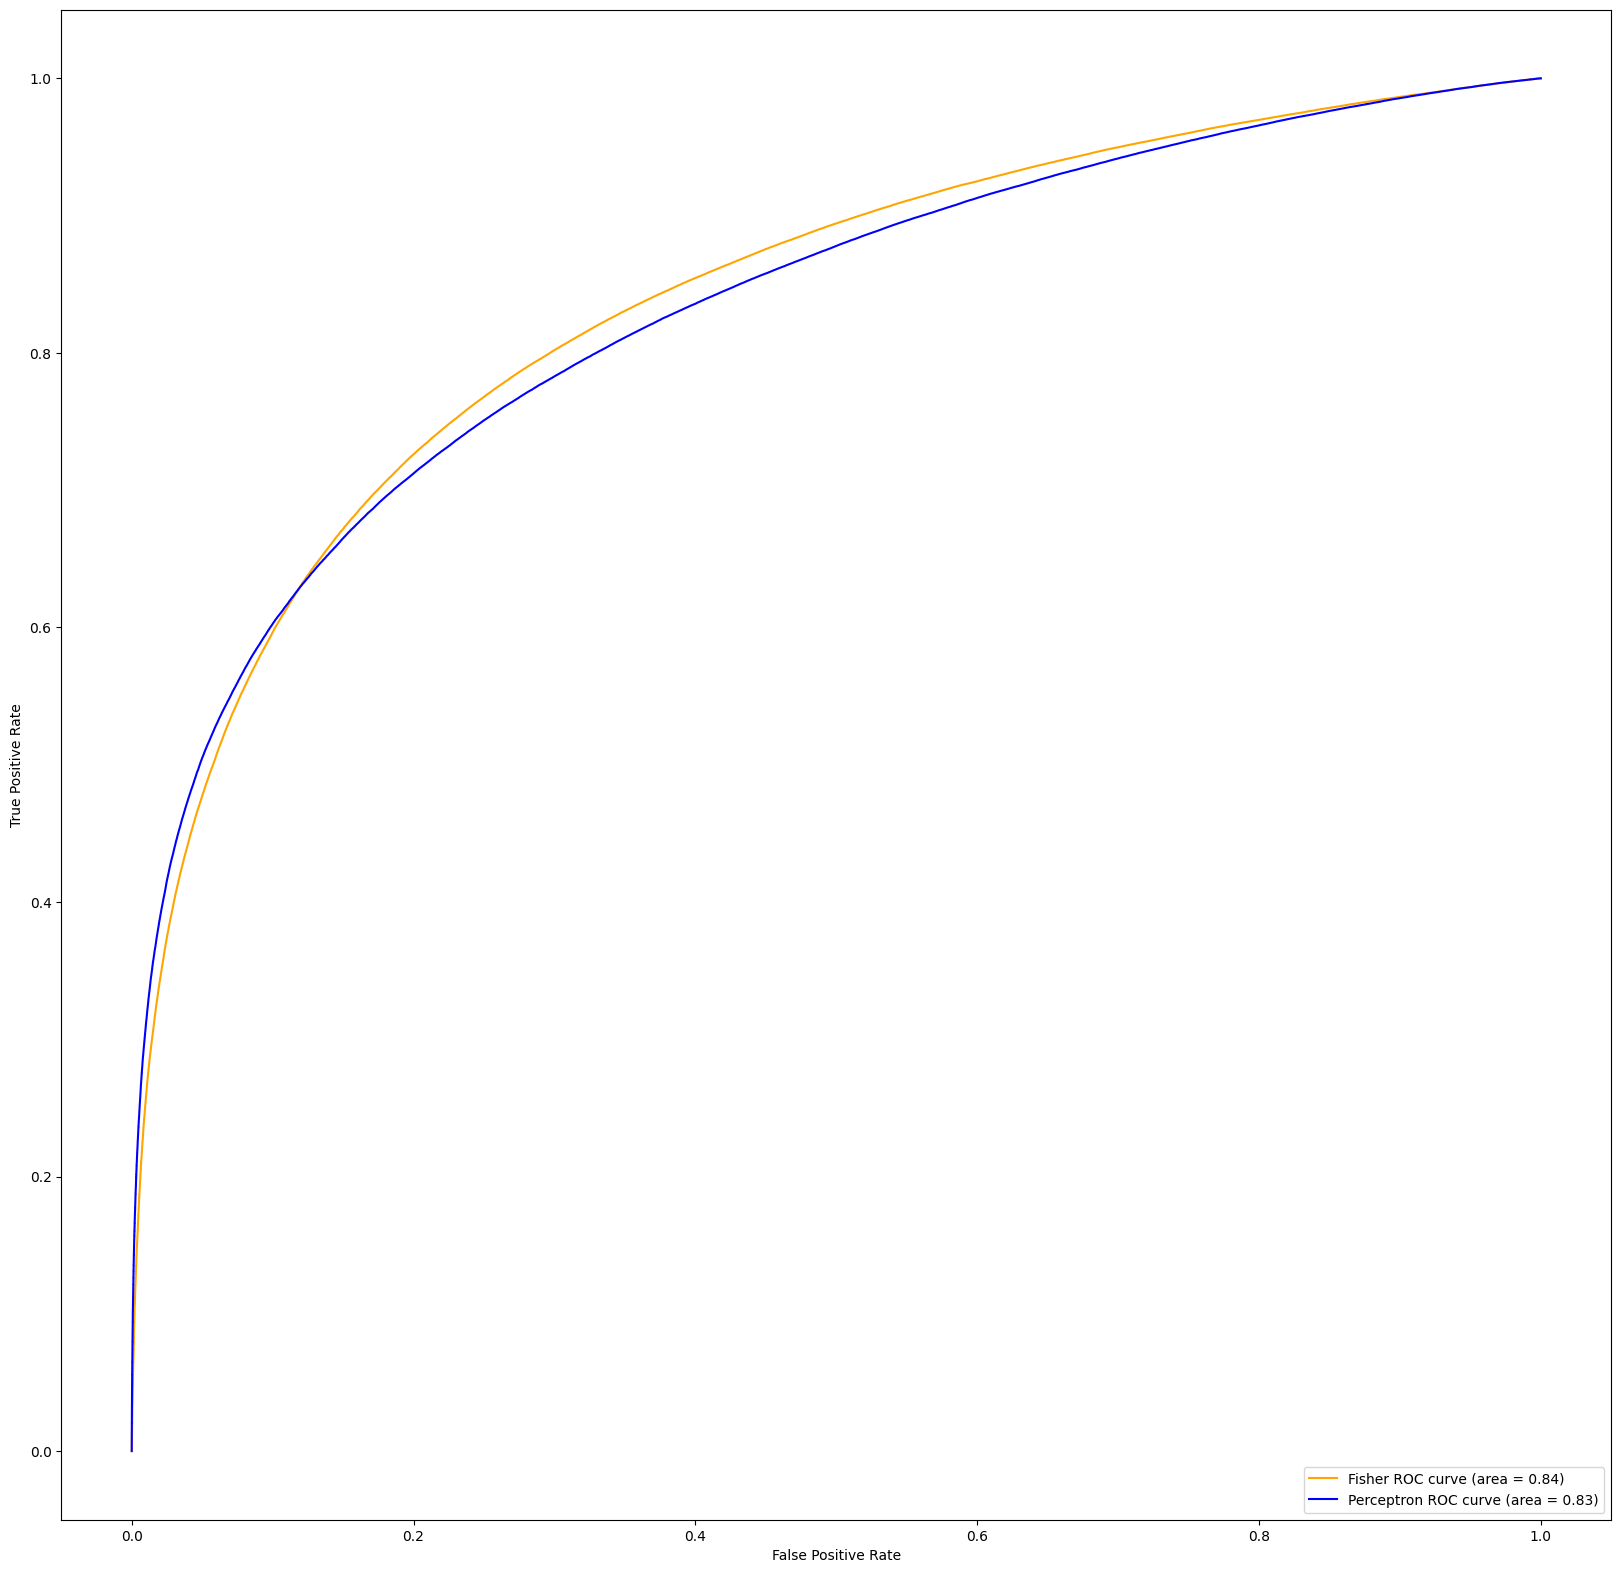

In [70]:
fpr, tpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))
roc_auc = auc(fpr, tpr)

fig,ax = plt.subplots(figsize=[20,20], dpi = 100)

fpr, tpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))
roc_auc = auc(fpr, tpr)
ax.plot(fpr,tpr,color='orange',label='Fisher ROC curve (area = %0.2f)' % roc_auc)

fpr, tpr, _ = roc_curve(y_Test, perc.decision_function(X_Test))
roc_auc = auc(fpr, tpr)
ax.plot(fpr,tpr,color='blue',label='Perceptron ROC curve (area = %0.2f)' % roc_auc)

ax.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [22]:
def predict_and_graph(tech, test_sig, test_back):
    plt.figure()
    plt.title(str(tech)[0:-2])
    sig_pred = test_sig[VarNames[1:]]
    back_pred = test_back[VarNames[1:]]
    plt.hist(clm.predict(sig_pred),bins=100,histtype="step", color="blue", label="signal",stacked=True)
    plt.hist(clm.predict(back_pred),bins=100,histtype="step", color="red", label="background",stacked=True)
    plt.legend(loc='upper right')
    plt.show()
    return sig_pred, back_pred

In [ ]:
def compare_techniques(tech_a, tech_b):
    

### Exercise 5- Metrics

Scikit-learn provides methods for computing the FPR, TPR, ROC, AUC metrics. For example:

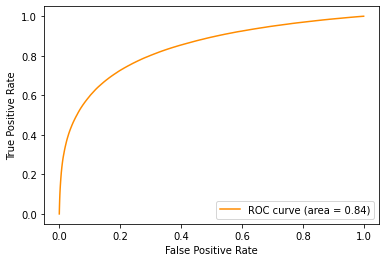

In [38]:
fpr, tpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [28]:
Fisher.decision_function(X_Test)

array([-0.97507599, -1.24082108,  2.01882522, ..., -1.16450765,
        2.49602394, -0.47443139])

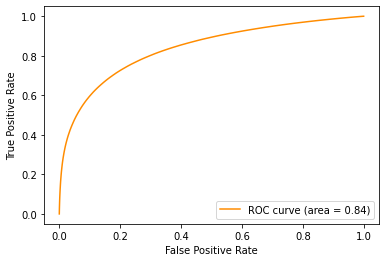

In [27]:
fpr, tpr, _ = roc_curve(y_Train, Fisher.decision_function(X_Train))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()


#### Part a
TPR/FPR/ROC/AUC are one way of assessing the quality of a classifier. Read about [Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall), [Accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision), and [F-score](https://en.wikipedia.org/wiki/F-score).

#### Part b
Look through [model evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html#) documentation. Using scikit-learns tools, compute TPR, FPR, ROC, AUC, Precision, Recall, F1 score, and accuracy for the method you selected in 4c above and each scenario. Make a nice table, which also includes the maximal significance. 
